In [1]:
!pip install scipy

In [8]:
!pip install scikit-learn

In [10]:
!pip install mlxtend

Importando bibliotecas

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from math import factorial
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

Importando os data sets

In [8]:
redW = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
whiteW = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

Juntando os data sets

In [9]:
df = pd.concat([redW, whiteW])
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


EDA

Verificando se há dados faltantes (não há)

In [10]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Verificando o tipo de dados (todos os dados são numéricos)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 659.9 KB


Verificando os valores

In [12]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Listando as colunas

In [13]:
df.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

Boxplot para visualizar os outliers

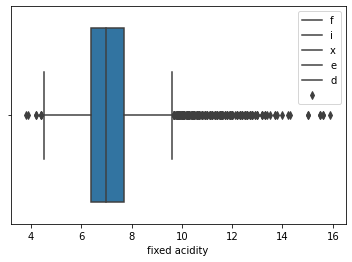

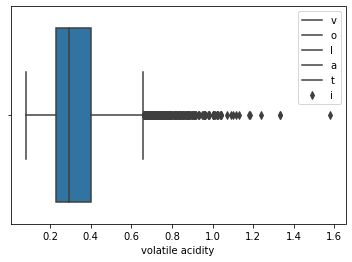

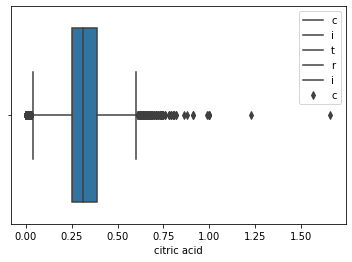

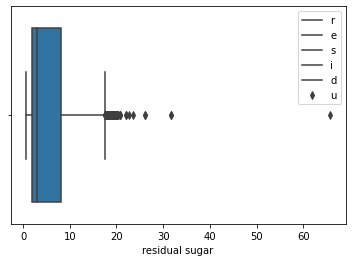

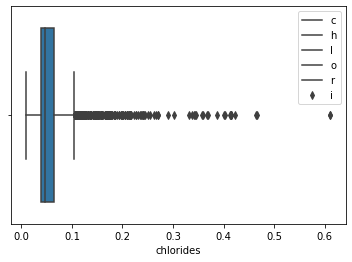

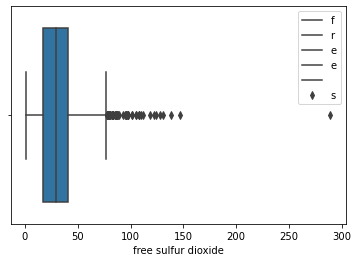

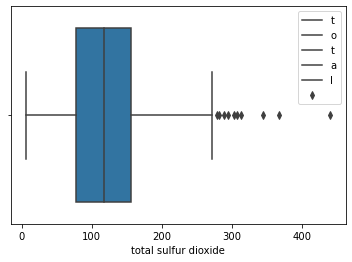

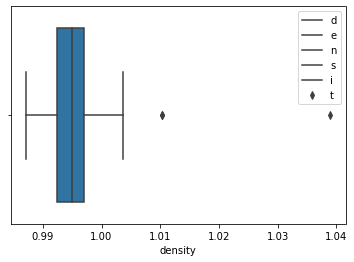

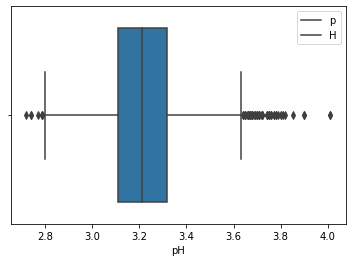

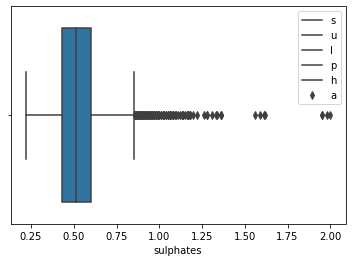

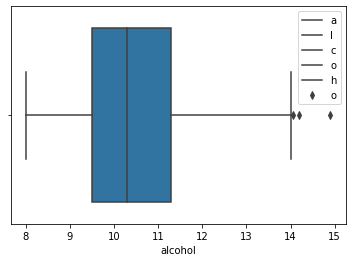

In [14]:
for carac in ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
             'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']:
    sns.boxplot(df[carac])
    plt.legend(carac)
    plt.show()

Análise Univariada

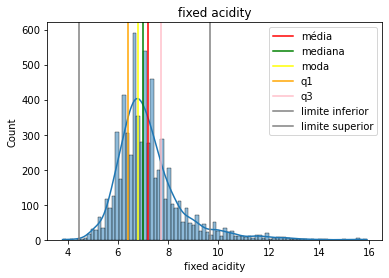

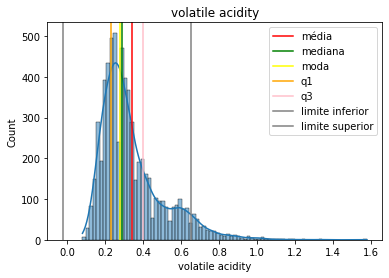

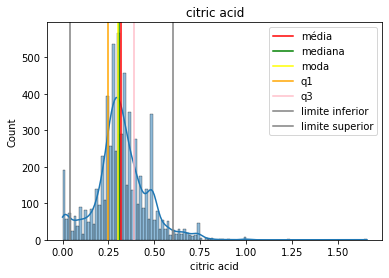

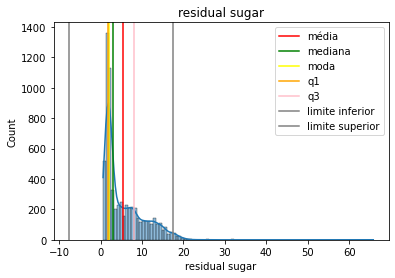

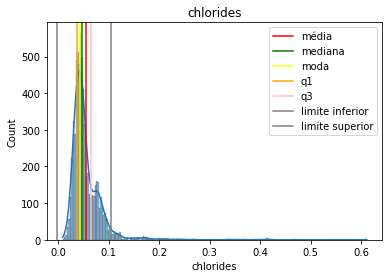

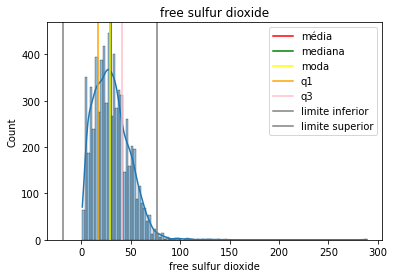

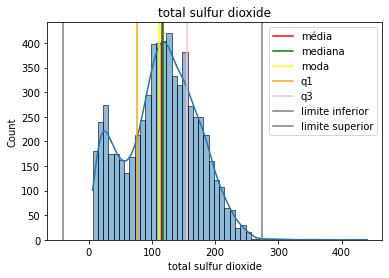

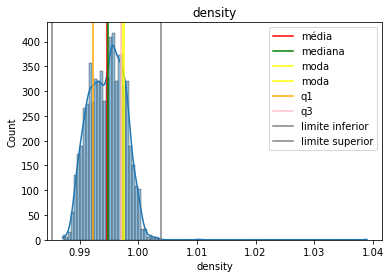

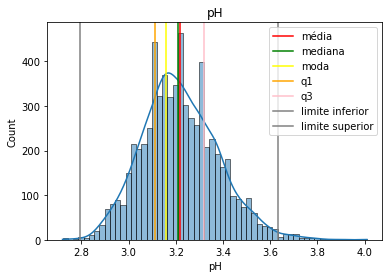

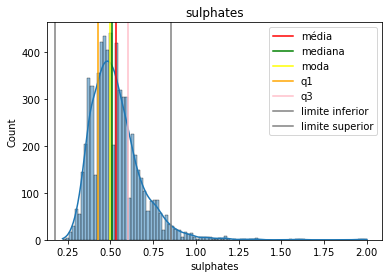

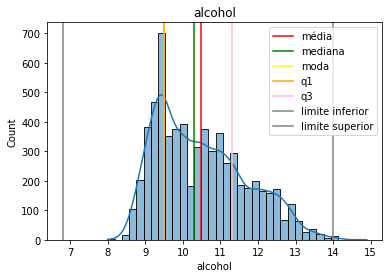

In [16]:
 for carac in ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
             'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']:
    sns.histplot(df[carac], kde=True)
    # média
    plt.axvline(x=df[carac].mean(), color="red", label="média")

    # mediana
    plt.axvline(df[carac].median(), color="green", label="mediana")

    # Modas
    for i in range(df[carac].mode().shape[0]):
        plt.axvline(df[carac].mode()[i], color="yellow", label="moda")

    plt.axvline(df[carac].quantile(0.25), color="orange", label="q1")
    plt.axvline(df[carac].quantile(0.75), color="pink", label="q3")

    IQR = df[carac].quantile(0.75) - df[carac].quantile(0.25)
    plt.axvline(df[carac].quantile(0.25)-1.5 * IQR, color="grey", label="limite inferior")
    plt.axvline(df[carac].quantile(0.75)+1.5 * IQR, color="grey", label="limite superior")

    plt.legend()

    plt.title(carac)
    plt.show()

Plotagem de probabilidade

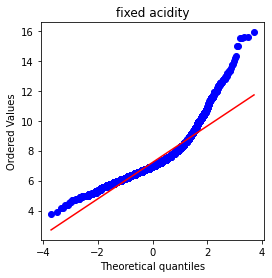

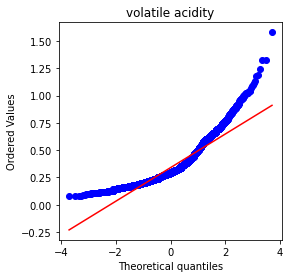

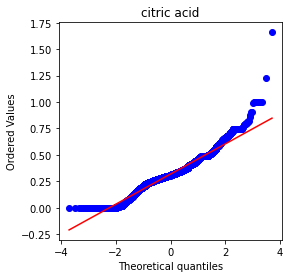

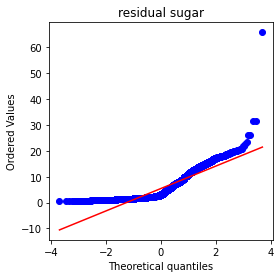

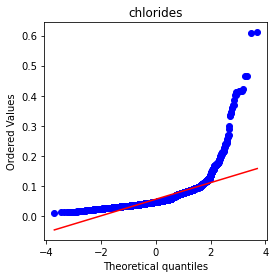

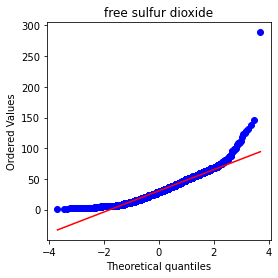

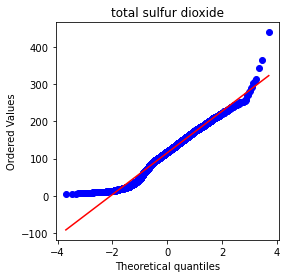

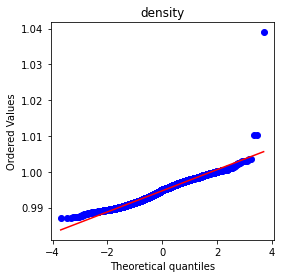

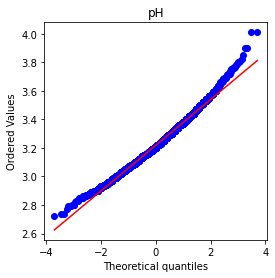

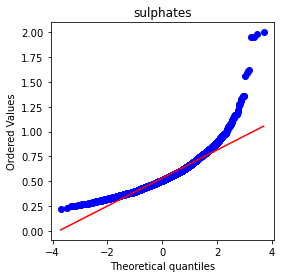

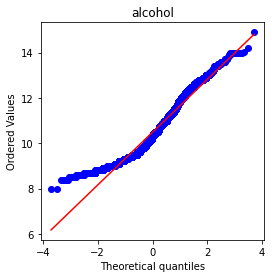

In [17]:
for carac in ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
             'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']:
    fig, ax = plt.subplots(figsize=(4, 4))

    stats.probplot(df[carac], plot=ax)
    plt.title(carac)
    plt.show()

Eliminar os outliers, pois eles vão interferir na classificação

In [18]:
#duplicando o data set
df2 = df

#encontrando o Q1, Q3 e a faixa de interquartil para cada coluna
Q1 = df2.quantile(q=0.25)
Q3 = df2.quantile(q=0.75)
IQR = df.apply(stats.iqr)

#mantendo somente as linhas do dataframe que têm os valores de 1.5*IQR de Q1 e Q3
df2 = df2[~((df2 < (Q1-1.5*IQR)) | (df2 > (Q3+1.5*IQR))).any(axis=1)]

In [19]:
df2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
10,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.99590,3.28,0.54,9.2,5
11,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.5,7
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


Reexplorando os dados após a eliminação dos outliers

Boxplot para visualizar os outliers restantes

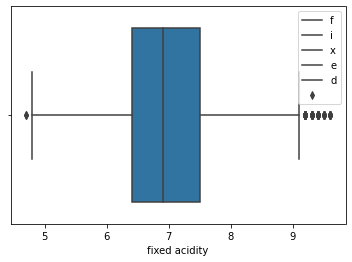

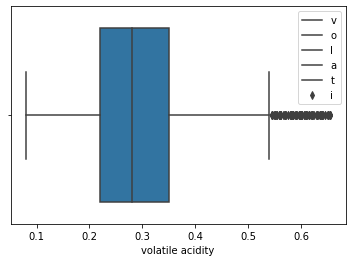

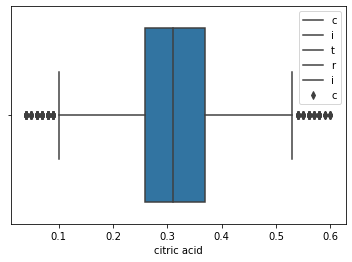

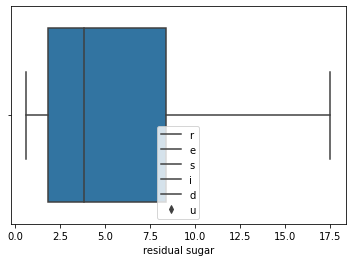

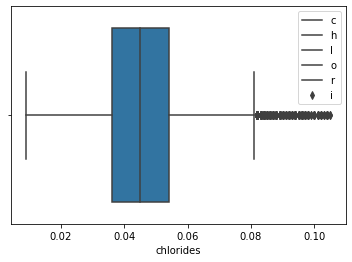

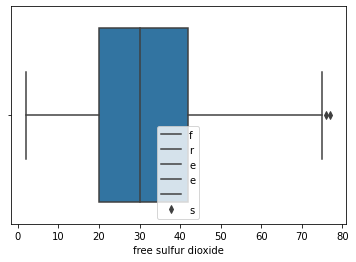

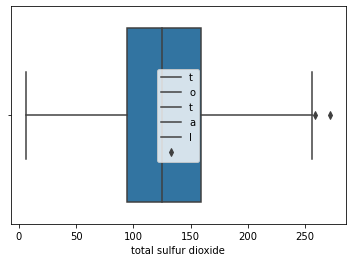

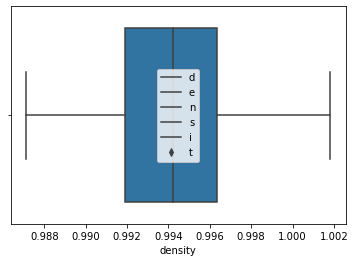

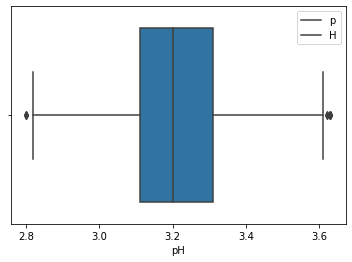

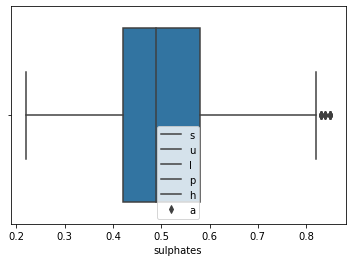

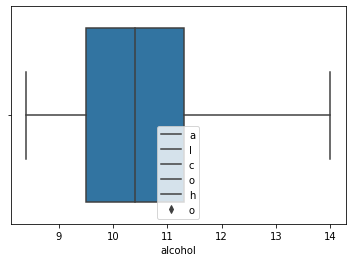

In [20]:
for carac in ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
             'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']:
    sns.boxplot(df2[carac])
    plt.legend(carac)
    plt.show()

Análise multivariada depois da limpeza de outliers

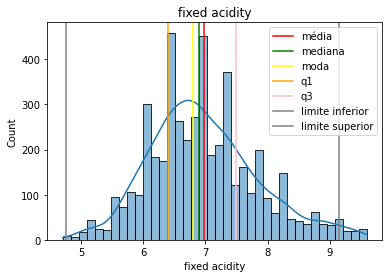

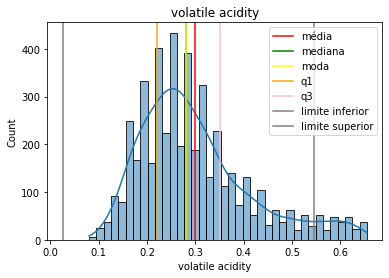

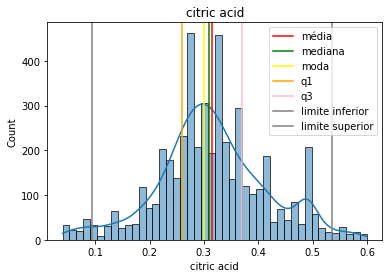

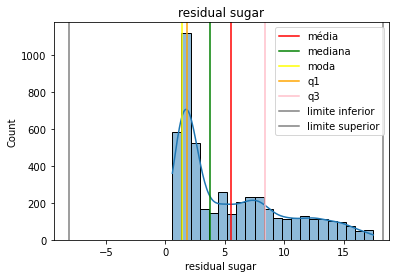

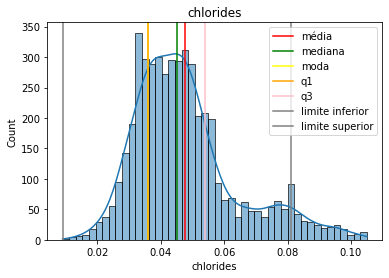

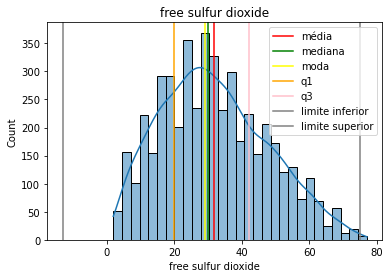

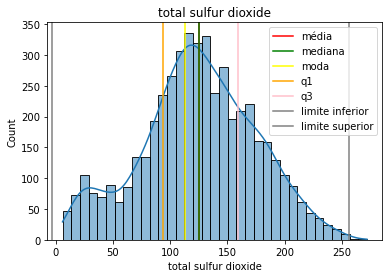

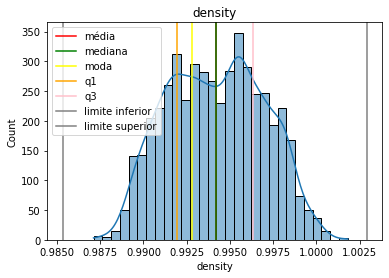

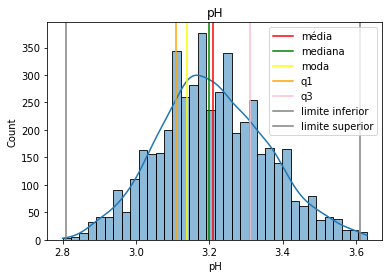

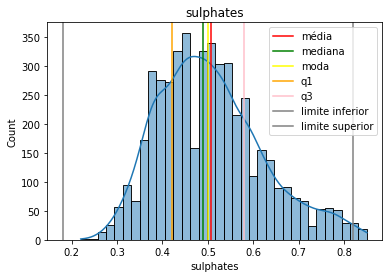

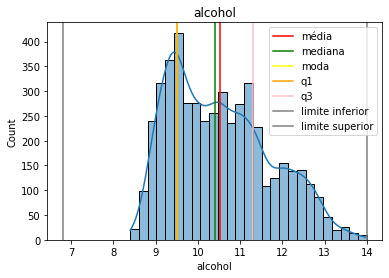

In [22]:
 for carac in ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
             'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']:
    sns.histplot(df2[carac], kde=True)
    # média
    plt.axvline(x=df2[carac].mean(), color="red", label="média")

    # mediana
    plt.axvline(df2[carac].median(), color="green", label="mediana")

    # Modas
    for i in range(df2[carac].mode().shape[0]):
        plt.axvline(df2[carac].mode()[i], color="yellow", label="moda")

    plt.axvline(df2[carac].quantile(0.25), color="orange", label="q1")
    plt.axvline(df2[carac].quantile(0.75), color="pink", label="q3")

    IQR = df2[carac].quantile(0.75) - df2[carac].quantile(0.25)
    plt.axvline(df2[carac].quantile(0.25)-1.5 * IQR, color="grey", label="limite inferior")
    plt.axvline(df2[carac].quantile(0.75)+1.5 * IQR, color="grey", label="limite superior")

    plt.legend()

    plt.title(carac)
    plt.show()

Plotagem de probabilidade

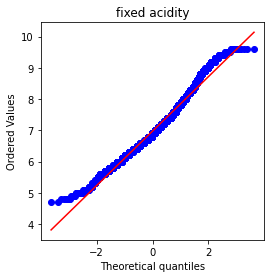

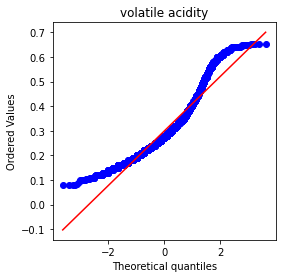

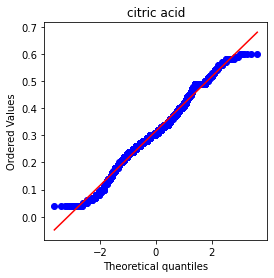

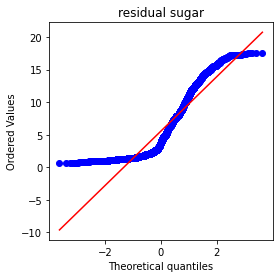

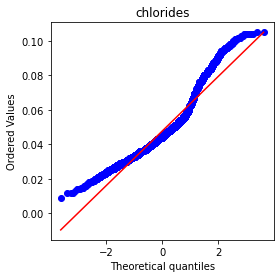

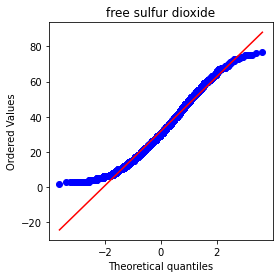

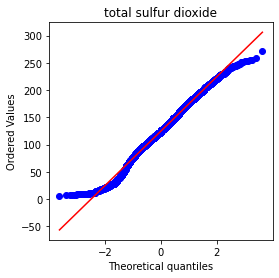

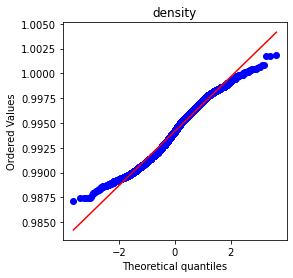

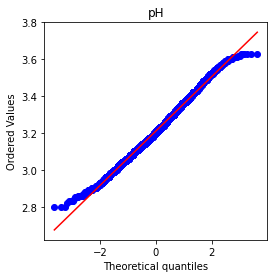

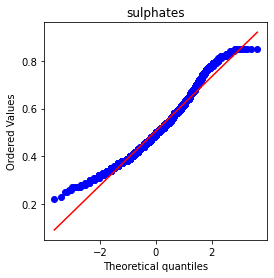

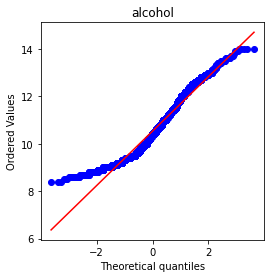

In [23]:
for carac in ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
             'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']:
    fig, ax = plt.subplots(figsize=(4, 4))

    stats.probplot(df2[carac], plot=ax)
    plt.title(carac)
    plt.show()

Verificando as correlações

In [24]:
df2.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.154874,0.237476,-0.041376,0.313918,-0.177491,-0.159699,0.337619,-0.245519,0.139643,-0.097150,-0.091185
volatile acidity,0.154874,1.000000,-0.324218,-0.113674,0.440948,-0.283347,-0.266944,0.199781,0.186345,0.179740,-0.024399,-0.226764
citric acid,0.237476,-0.324218,1.000000,0.098929,-0.117202,0.143050,0.173260,0.031355,-0.183618,0.023348,0.042462,0.079471
residual sugar,-0.041376,-0.113674,0.098929,1.000000,-0.056946,0.421086,0.476675,0.653377,-0.238572,-0.123393,-0.397902,-0.045903
chlorides,0.313918,0.440948,-0.117202,-0.056946,1.000000,-0.192127,-0.244083,0.516429,0.217913,0.313603,-0.382051,-0.256976
free sulfur dioxide,-0.177491,-0.283347,0.143050,0.421086,-0.192127,1.000000,0.680438,0.171295,-0.128167,-0.100485,-0.209182,0.055663
total sulfur dioxide,-0.159699,-0.266944,0.173260,0.476675,-0.244083,0.680438,1.000000,0.226543,-0.195034,-0.160427,-0.329855,-0.090688
density,0.337619,0.199781,0.031355,0.653377,0.516429,0.171295,0.226543,1.000000,0.067943,0.204452,-0.769342,-0.304314
pH,-0.245519,0.186345,-0.183618,-0.238572,0.217913,-0.128167,-0.195034,0.067943,1.000000,0.275823,0.048581,0.039561
sulphates,0.139643,0.179740,0.023348,-0.123393,0.313603,-0.100485,-0.160427,0.204452,0.275823,1.000000,-0.029708,0.054356


Visualizando o mapa de calor das correlçãoes, não se atentando pela quality que será o target

<AxesSubplot:>

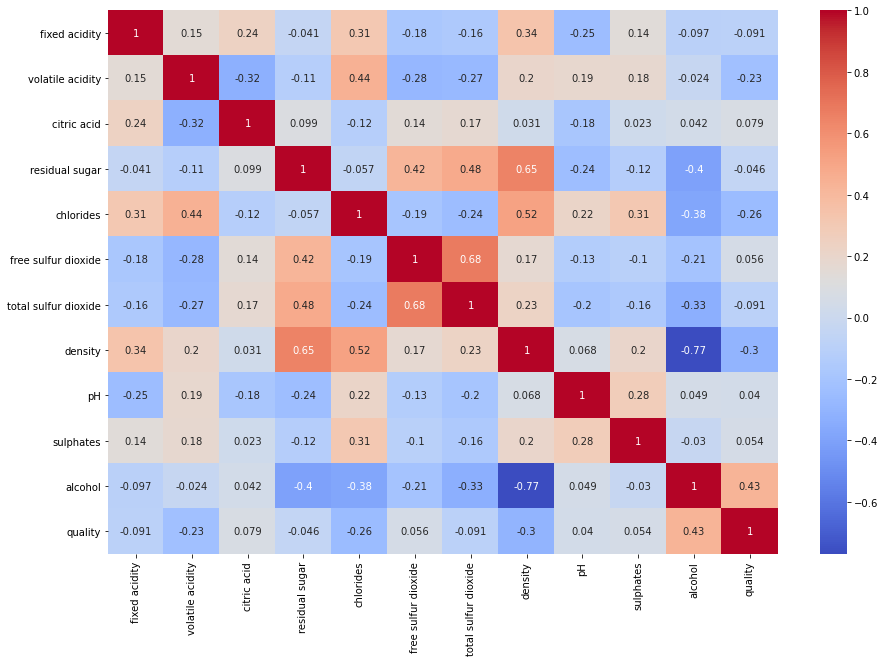

In [25]:
plt.figure(figsize=(15,10))
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm')

Listando as colunas novamente

In [26]:
df2.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Criando um data frame somente com as features que possuem boas correlações

In [57]:
df3 = df2.iloc[:,[3,5,6,7,10,11]]
df3

,residual sugar,free sulfur dioxide,total sulfur dioxide,density,alcohol,quality
6,1.6,15.0,59.0,0.99640,9.4,5
9,6.1,17.0,102.0,0.99780,10.5,5
10,1.8,15.0,65.0,0.99590,9.2,5
11,6.1,17.0,102.0,0.99780,10.5,5
16,1.8,35.0,103.0,0.99690,10.5,7
...,...,...,...,...,...,...
4893,1.6,24.0,92.0,0.99114,11.2,6
4894,8.0,57.0,168.0,0.99490,9.6,5
4895,1.2,30.0,111.0,0.99254,9.4,6
4896,1.1,20.0,110.0,0.98869,12.8,7


Atribuindo a classificação de 'Bom' ou 'Ruim'(variável qualitativa nominal) conforme o valor proposto e de acordo com o score da feature 'quality'

In [58]:
df3.loc[df3['quality'] >= 6, '_quality'] = 'Bom'
df3.loc[df3['quality'] < 6, '_quality'] = 'Ruim'

df3

,residual sugar,free sulfur dioxide,total sulfur dioxide,density,alcohol,quality,_quality
6,1.6,15.0,59.0,0.99640,9.4,5,Ruim
9,6.1,17.0,102.0,0.99780,10.5,5,Ruim
10,1.8,15.0,65.0,0.99590,9.2,5,Ruim
11,6.1,17.0,102.0,0.99780,10.5,5,Ruim
16,1.8,35.0,103.0,0.99690,10.5,7,Bom
...,...,...,...,...,...,...,...
4893,1.6,24.0,92.0,0.99114,11.2,6,Bom
4894,8.0,57.0,168.0,0.99490,9.6,5,Ruim
4895,1.2,30.0,111.0,0.99254,9.4,6,Bom
4896,1.1,20.0,110.0,0.98869,12.8,7,Bom


Criando dummies da variável qualitativa nominal

In [59]:
df3_dummies = pd.get_dummies(df3, prefix_sep='_', columns=['_quality'])
df3_dummies

,residual sugar,free sulfur dioxide,total sulfur dioxide,density,alcohol,quality,_quality_Bom,_quality_Ruim
6,1.6,15.0,59.0,0.99640,9.4,5,0,1
9,6.1,17.0,102.0,0.99780,10.5,5,0,1
10,1.8,15.0,65.0,0.99590,9.2,5,0,1
11,6.1,17.0,102.0,0.99780,10.5,5,0,1
16,1.8,35.0,103.0,0.99690,10.5,7,1,0
...,...,...,...,...,...,...,...,...
4893,1.6,24.0,92.0,0.99114,11.2,6,1,0
4894,8.0,57.0,168.0,0.99490,9.6,5,0,1
4895,1.2,30.0,111.0,0.99254,9.4,6,1,0
4896,1.1,20.0,110.0,0.98869,12.8,7,1,0


Analisando a nova correlação

In [60]:
df3_dummies.corr()

,residual sugar,free sulfur dioxide,total sulfur dioxide,density,alcohol,quality,_quality_Bom,_quality_Ruim
residual sugar,1.000000,0.421086,0.476675,0.653377,-0.397902,-0.045903,-0.028644,0.028644
free sulfur dioxide,0.421086,1.000000,0.680438,0.171295,-0.209182,0.055663,0.050090,-0.050090
total sulfur dioxide,0.476675,0.680438,1.000000,0.226543,-0.329855,-0.090688,-0.081614,0.081614
density,0.653377,0.171295,0.226543,1.000000,-0.769342,-0.304314,-0.268138,0.268138
alcohol,-0.397902,-0.209182,-0.329855,-0.769342,1.000000,0.428784,0.376395,-0.376395
quality,-0.045903,0.055663,-0.090688,-0.304314,0.428784,1.000000,0.850908,-0.850908
_quality_Bom,-0.028644,0.050090,-0.081614,-0.268138,0.376395,0.850908,1.000000,-1.000000
_quality_Ruim,0.028644,-0.050090,0.081614,0.268138,-0.376395,-0.850908,-1.000000,1.000000


Criação do modelo, separando em treino e teste

In [68]:
x = df3_dummies[['alcohol','free sulfur dioxide','_quality_Bom', '_quality_Ruim']]
y = df3_dummies['quality']

In [69]:
x

,alcohol,free sulfur dioxide,_quality_Bom,_quality_Ruim
6,9.4,15.0,0,1
9,10.5,17.0,0,1
10,9.2,15.0,0,1
11,10.5,17.0,0,1
16,10.5,35.0,1,0
...,...,...,...,...
4893,11.2,24.0,1,0
4894,9.6,57.0,0,1
4895,9.4,30.0,1,0
4896,12.8,20.0,1,0


In [70]:
y

6       5
9       5
10      5
11      5
16      7
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4840, dtype: int64

Treinando o modelo

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.25)

Criando o objeto de regressão

In [73]:
model = LinearRegression()

Treinando a regressão

In [75]:
model.fit(x_train, y_train)

LinearRegression()

Testando o modelo treinado

In [76]:
y_pred = model.predict(x_test)

Coeficiente angular

In [77]:
model.coef_

array([ 0.08865554,  0.00234812,  0.63748306, -0.63748306])

Intercept (coeficiente linear)

In [78]:
model.intercept_

4.609213769440499

Predição da qualidade

In [79]:
df_test = pd.concat([x_test, y_test, pd.Series(y_pred, name='quality_pred', index=y_test.index)], axis=1)
df_test

,alcohol,free sulfur dioxide,_quality_Bom,_quality_Ruim,quality,quality_pred
3012,12.2,29.0,1,0,6,6.396390
2233,9.7,10.0,0,1,5,4.855171
4069,10.7,54.0,1,0,6,6.322109
1516,10.6,53.0,1,0,6,6.310896
1033,10.2,44.5,1,0,6,6.255475
...,...,...,...,...,...,...
428,9.3,9.0,0,1,5,4.817360
1280,10.4,28.0,1,0,6,6.234462
4255,9.2,16.0,0,1,5,4.824932
1838,9.3,53.0,1,0,6,6.195644


Valores de erro

In [80]:
df_test['erro'] = y_pred - y_test
df_test

,alcohol,free sulfur dioxide,_quality_Bom,_quality_Ruim,quality,quality_pred,erro
3012,12.2,29.0,1,0,6,6.396390,0.396390
2233,9.7,10.0,0,1,5,4.855171,-0.144829
4069,10.7,54.0,1,0,6,6.322109,0.322109
1516,10.6,53.0,1,0,6,6.310896,0.310896
1033,10.2,44.5,1,0,6,6.255475,0.255475
...,...,...,...,...,...,...,...
428,9.3,9.0,0,1,5,4.817360,-0.182640
1280,10.4,28.0,1,0,6,6.234462,0.234462
4255,9.2,16.0,0,1,5,4.824932,-0.175068
1838,9.3,53.0,1,0,6,6.195644,0.195644


Avaliando o modelo

In [86]:
print(f'O modelo tem {round(r2_score(y_test, y_pred)*100,2)}% de precisão')

O modelo tem 73.52% de precisão


Percentual do valor de erro

In [101]:
mae = mean_absolute_error(y_test, y_pred)/y_test.mean()*100
mse = np.sqrt(mean_squared_error(y_test, y_pred)/y_test.mean()**2)*100
print(f'O valor do erro médio absoluto é de {round(mae,2)}%')
print(f'O valor do erro médio quadrado é de {round(mse,2)}%')

O valor do erro médio absoluto é de 5.41%
O valor do erro médio quadrado é de 6.89%
